In [ ]:
# beta파 쪼개보기

In [210]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

# Fp1_FFT 파일 불러오기
import pandas as pd
from datetime import datetime
 
df = pd.read_table('C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/FP1/혜진/2022-06-04_오후 5_51/Fp1_FFT.txt',sep='\t',encoding = 'cp949')

df['mu8-12'] = 0
df['beta12-16'] = 0
df['beta16-20'] = 0
df['beta16-20'] = 0
df['beta20-24'] = 0
df['beta24-28'] = 0
df['beta28-32'] = 0
df['beta32-36'] = 0
df['beta36-40'] = 0

# 베타파 쪼개기
for i in range(1,len(df.columns)-9): # 마지막 컬럼 세개가 mu, beta,beta 여서 그거 제외한거
    if float(df.columns[i][:-2])>=8 and float(df.columns[i][:-2])<12 : # 뮤파
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=12 and float(df.columns[i][:-2])<16:
        df['beta12-16'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=16 and float(df.columns[i][:-2])<20:
        df['beta16-20'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=20 and float(df.columns[i][:-2])<24:
        df['beta20-24'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=24 and float(df.columns[i][:-2])<28:
        df['beta24-28'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=28 and float(df.columns[i][:-2])<32:
        df['beta28-32'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=32 and float(df.columns[i][:-2])<36:
        df['beta32-36'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=36 and float(df.columns[i][:-2])<40:
        df['beta36-40'] += df[df.columns[i]]
        
# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
f = open("C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/clicktime/혜진/2022-6-4 17.52.txt", "r")
click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7],"%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H"))>12 :
        h = int(times.strftime("%H"))-12
        time_new =times.strftime("오후 "+ str(h)+":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new =times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)
        

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0,len(df)) : # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:],"%H:%M:%S") # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)): # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:],"%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i,j)
            df['click'][i] += 1
            break
            
# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0,len(df)) : 
    if df['click'][j] == 1:
        if df['click'][j+1] == 1:
            df['click'][j+1] -= 1
            if df['click'][j+2] == 1:
                df['click'][j+2] -= 1
            
            

  

41 0
42 0
55 1
56 1
68 2
69 2
80 3
81 3
90 4
91 4
100 5
101 5
111 6
112 6
121 7
122 7
132 8
133 8
142 9
143 9
153 10
154 10
164 11
165 11
176 12
177 12
186 13
187 13
198 14
199 14


C:\Users\hhz20\AppData\Local\Temp/ipykernel_11016/2623201745.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1
C:\Users\hhz20\AppData\Local\Temp/ipykernel_11016/2623201745.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+1] -= 1


In [211]:
df[df.columns[-9:-1]]

,mu8-12,beta12-16,beta16-20,beta20-24,beta24-28,beta28-32,beta32-36,beta36-40
0,3.351880e-11,7.261500e-12,4.973600e-12,4.990100e-12,5.927500e-12,1.098160e-11,7.345400e-12,3.842500e-12
1,3.296470e-11,8.497700e-12,4.578300e-12,3.546200e-12,6.110300e-12,1.004540e-11,6.415300e-12,3.615800e-12
2,1.838000e-11,9.460300e-12,5.474200e-12,3.198900e-12,6.054400e-12,9.810100e-12,6.938500e-12,3.854400e-12
3,4.533160e-11,1.152220e-11,7.649300e-12,3.824100e-12,7.132400e-12,9.585100e-12,8.693400e-12,5.030300e-12
4,2.842920e-11,1.226700e-11,7.074100e-12,4.592000e-12,6.928400e-12,8.396500e-12,6.204800e-12,5.378300e-12
...,...,...,...,...,...,...,...,...
203,8.555400e-12,3.681000e-12,4.771200e-12,2.954600e-12,6.005500e-12,6.208800e-12,3.735000e-12,4.330500e-12
204,9.333100e-12,2.840800e-12,4.781900e-12,2.263800e-12,6.404000e-12,6.225600e-12,5.401500e-12,3.898700e-12
205,8.818600e-12,3.462100e-12,4.167200e-12,3.695100e-12,6.218600e-12,5.346900e-12,5.357900e-12,3.460300e-12
206,1.278900e-11,6.102700e-12,4.822400e-12,3.937700e-12,6.263800e-12,5.845400e-12,4.333500e-12,4.660000e-12


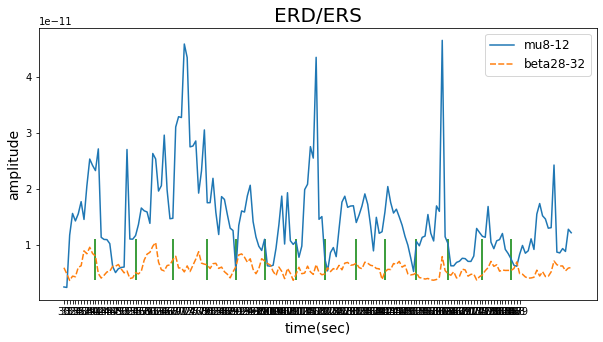

In [212]:
# 그래프 그리기     
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Line graph by seaborn
df_=df[['mu8-12','beta28-32']]
ax = sns.lineplot(data=df_[30:210])
# ax = sns.lineplot(data=df[df.columns['mu8-12','beta12-16']][60:205])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(30, 190, 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(30,190) :
# for i in range(50,len(df)) :
    if df['click'][i] ==1 :
#         min(df['mu8-12'][60:205]),max(df['mu8-12'][60:205])

#         min_ = [min(df['beta36-40'][60:205])]
#         max_ = [max(df['beta36-40'][60:205])]
#         min_ = [min(df['mu8-12'][50:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(df_[df_.columns[1]]),max(df_[df_.columns[1]]), color="green")
plt.show()   

# 앞뒤간격 5초 평균내기

In [213]:
# # click 시점의 행넘버 리스트에 넣어주기
click_row_num = [] # click 시점의 행넘버

for k in range(len(df)) : 
    if df['click'][k] == 1: # click 시점의 행넘버 구하기
        click_row_num.append(k)

# 데이터프레임 이름 df_click_trial1~15까지 해서 각 trial마다 10초동안의 데이터프레임 잘라서 넣어주기. 
for i in range(len(click_row_num)):
    globals()['df_click_trial{}'.format(i+1)] = df[df.columns[-9:]][click_row_num[i]-5:click_row_num[i]+6]
    
# 데이터프레임 1-15까지 합쳐서 평균 낸 데이터프레임 만들어주기.
df_average=df_click_trial1
df_average.reset_index(drop=True,inplace = True)

for i in range(1,len(click_row_num)):
    df_average+=globals()['df_click_trial{}'.format(i+1)].reset_index(drop=True)
    
df_average=df_average/len(click_row_num)

In [214]:
df_average

,mu8-12,beta12-16,beta16-20,beta20-24,beta24-28,beta28-32,beta32-36,beta36-40,click
0,1.604161e-11,4.418313e-12,2.913107e-12,3.719413e-12,4.638347e-12,5.704280e-12,5.073833e-12,3.286327e-12,0.0
1,1.473205e-11,4.013833e-12,2.892340e-12,3.734987e-12,4.888907e-12,5.579440e-12,5.189960e-12,3.527907e-12,0.0
2,1.862232e-11,5.270833e-12,3.717300e-12,4.259167e-12,5.166987e-12,5.805267e-12,5.212933e-12,3.554333e-12,0.0
3,1.668359e-11,4.924613e-12,3.190367e-12,3.770020e-12,5.732300e-12,5.632193e-12,4.925300e-12,3.598287e-12,0.0
4,1.393336e-11,3.789547e-12,2.536520e-12,3.283200e-12,5.340700e-12,5.451273e-12,4.916740e-12,3.725513e-12,0.0
5,1.241889e-11,4.262380e-12,2.595967e-12,3.290080e-12,5.597147e-12,5.705053e-12,4.680940e-12,3.611713e-12,1.0
6,1.365391e-11,4.346527e-12,2.580973e-12,3.378973e-12,5.170553e-12,5.722573e-12,4.868313e-12,3.793340e-12,0.0
7,1.410876e-11,4.690720e-12,2.776360e-12,3.477100e-12,4.967947e-12,5.681253e-12,5.258887e-12,3.951047e-12,0.0
8,1.490479e-11,5.221547e-12,3.150133e-12,4.003940e-12,4.683847e-12,5.905860e-12,5.679767e-12,3.695820e-12,0.0
9,1.503401e-11,4.859300e-12,3.017547e-12,3.714420e-12,4.443973e-12,5.758507e-12,5.682987e-12,3.585227e-12,0.0


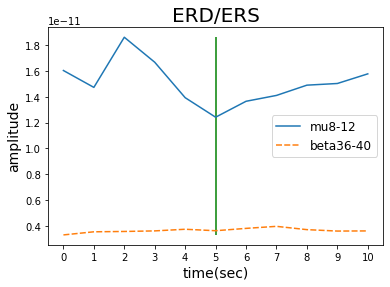

In [221]:
# average 낸거 그래프 그리기
# beta12-16  beta16-20 beta20-24 beta24-28 beta28-32 beta32-36 beta36-40

df_ = df_average[['mu8-12','beta36-40']]
ax = sns.lineplot(data=df_)
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])

plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0, len(df_), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(0, len(df_), 1) :
# for i in range(50,len(df)) :
    if df_average['click'][i] == 1 :
        min_ = [min(df_[df_.columns[0]]),min(df_[df_.columns[1]])]
        max_ = [max(df_[df_.columns[0]]),max(df_[df_.columns[1]])]
#         min_ = [min(df['mu8-12'][30:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
    

plt.show()     

# theta파 확인

28 0
29 0
30 0
39 1
40 1
41 1
50 2
51 2
52 2
59 3
60 3
61 3
71 4
83 5
84 5
85 5
95 6
96 6
107 7
108 7
120 8
121 8
136 9
137 9
147 10
148 10
159 11
160 11
172 12
173 12
181 13
182 13
195 14
196 14


C:\Users\hhz20\AppData\Local\Temp/ipykernel_11016/3708760858.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][i] += 1
C:\Users\hhz20\AppData\Local\Temp/ipykernel_11016/3708760858.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+1] -= 1
C:\Users\hhz20\AppData\Local\Temp/ipykernel_11016/3708760858.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['click'][j+2] -= 1


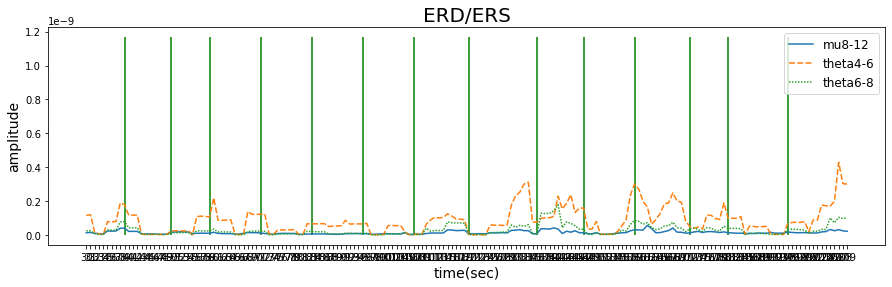

In [317]:
## 주석 부분은 범위 바꿔주고 싶을 때 바꾸면 되는 부분.

# Fp1_FFT 파일 불러오기
import pandas as pd
from datetime import datetime
 
df = pd.read_table('C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/FP1/승철/2022-06-09_오후 3_53/Fp1_FFT.txt',sep='\t',encoding = 'cp949')

df['mu8-12'] = 0
df['theta4-6'] = 0
df['theta6-8'] = 0
df['beta12-16'] = 0
df['beta16-20'] = 0
df['beta16-20'] = 0
df['beta20-24'] = 0
df['beta24-28'] = 0
df['beta28-32'] = 0
df['beta32-36'] = 0
df['beta36-40'] = 0

# 베타파 쪼개기 # 이것도 수정 -11
for i in range(1,len(df.columns)-11): # 마지막 컬럼 세개가 mu, beta,beta 여서 그거 제외한거
    if float(df.columns[i][:-2])>=8 and float(df.columns[i][:-2])<12 : # 뮤파
        df['mu8-12'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=4 and float(df.columns[i][:-2])<6:
        df['theta4-6'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=6 and float(df.columns[i][:-2])<8:
        df['theta6-8'] += df[df.columns[i]]    
    elif float(df.columns[i][:-2])>=12 and float(df.columns[i][:-2])<16:
        df['beta12-16'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=16 and float(df.columns[i][:-2])<20:
        df['beta16-20'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=20 and float(df.columns[i][:-2])<24:
        df['beta20-24'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=24 and float(df.columns[i][:-2])<28:
        df['beta24-28'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=28 and float(df.columns[i][:-2])<32:
        df['beta28-32'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=32 and float(df.columns[i][:-2])<36:
        df['beta32-36'] += df[df.columns[i]]
    elif float(df.columns[i][:-2])>=36 and float(df.columns[i][:-2])<40:
        df['beta36-40'] += df[df.columns[i]]
        
# ClickTime 파일 불러와서 배열에 저장.
# click time 시간포맷 변경해서 리스트에 넣기 오후 ㅁ:ㅁㅁ:ㅁㅁ
f = open("C:/Users/hhz20/신경공학 데이터/뇌파/MAVE_RawData/FP1/승철/2022-06-09_오후 3_53/clicktime.txt", "r")
click_time = []
while True:
    line = f.readline().strip()
    if not line: break
    click_time.append(line)

click_time_reformat = []
for i in range(len(click_time)):
    times = datetime.strptime(click_time[i][:-7],"%Y-%m-%d %H:%M:%S")
    if int(times.strftime("%H"))>12 :
        h = int(times.strftime("%H"))-12
        time_new =times.strftime("오후 "+ str(h)+":%M:%S")
        click_time_reformat.append(time_new)
    else:
        time_new =times.strftime("오전 %H:%M:%S")
        click_time_reformat.append(time_new)
        

# click에 시간차 0초 1초 인걸로 클릭 타이밍 1로 만들어주기.
df['click'] = 0
df['Time']
for i in range(0,len(df)) : # 뇌파기기에서 찍힌 시간
    df['Time'][i].split('.')
    time_1 = datetime.strptime(df['Time'][i].split('.')[0][3:],"%H:%M:%S") # 10이랑 11 조정해줘야함.
    for j in range(0, len(click_time)): # 클릭버튼 눌러서 찍힌 시간
        time_2 = datetime.strptime(click_time_reformat[j][3:],"%H:%M:%S")
        time_interval = time_2 - time_1
        if str(time_interval) == '0:00:00' or str(time_interval) == '0:00:01':
            print(i,j)
            df['click'][i] += 1
            break
            
# 중복된 click time 제거해주기 (3개까지 동시에 나오는 경우가 있어서 그거 제거 해줌)
for j in range(0,len(df)) : 
    if df['click'][j] == 1:
        if df['click'][j+1] == 1:
            df['click'][j+1] -= 1
            if df['click'][j+2] == 1:
                df['click'][j+2] -= 1
            
            

# 그래프 그리기     
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

# Line graph by seaborn
df_=df[['mu8-12','theta4-6','theta6-8']]
ax = sns.lineplot(data=df_[30:210])
# ax = sns.lineplot(data=df[df.columns['mu8-12','beta12-16']][60:205])
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])
plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(30, 210, 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(30,210) :
# for i in range(50,len(df)) :
    if df['click'][i] ==1 :
#         min(df['mu8-12'][60:205]),max(df['mu8-12'][60:205])
        min_ = [min(df_[df_.columns[0]]),min(df_[df_.columns[1]]),min(df_[df_.columns[2]])]
        max_ = [max(df_[df_.columns[0]]),max(df_[df_.columns[1]]),max(df_[df_.columns[2]])]
#         min_ = [min(df['beta36-40'][60:205])]
#         max_ = [max(df['beta36-40'][60:205])]
#         min_ = [min(df['mu8-12'][50:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
plt.show()     

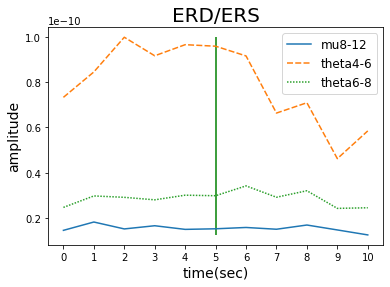

In [318]:
# # click 시점의 행넘버 리스트에 넣어주기
click_row_num = [] # click 시점의 행넘버

for k in range(len(df)) : 
    if df['click'][k] == 1: # click 시점의 행넘버 구하기
        click_row_num.append(k)

# 데이터프레임 이름 df_click_trial1~15까지 해서 각 trial마다 10초동안의 데이터프레임 잘라서 넣어주기. # 바뀌면 여기 -11 부분 수정
for i in range(len(click_row_num)):
    globals()['df_click_trial{}'.format(i+1)] = df[df.columns[-11:]][click_row_num[i]-5:click_row_num[i]+6]
    
# 데이터프레임 1-15까지 합쳐서 평균 낸 데이터프레임 만들어주기.
df_average=df_click_trial1
df_average.reset_index(drop=True,inplace = True)

for i in range(1,len(click_row_num)):
    df_average+=globals()['df_click_trial{}'.format(i+1)].reset_index(drop=True)
    
df_average=df_average/len(click_row_num)

# average 낸거 그래프 그리기
# beta12-16  beta16-20 beta20-24 beta24-28 beta28-32 beta32-36 beta36-40

df_ = df_average[['mu8-12','theta4-6','theta6-8']]
ax = sns.lineplot(data=df_)
# ax = sns.lineplot(data=df[df.columns[-4:-1]][50:])

plt.title('ERD/ERS', fontsize=20)
plt.ylabel('amplitude', fontsize=14)

plt.xlabel('time(sec)', fontsize=14)
plt.xticks([i for i in range(0, len(df_), 1)])
# plt.xticks([i for i in range(50, len(df), 1)])
plt.legend(fontsize=12, loc='best')

# 세로 녹색 선 : 클릭 시점 표시해주기. 
for i in range(0, len(df_), 1) :
# for i in range(50,len(df)) :
    if df_average['click'][i] == 1 :
        min_ = [min(df_[df_.columns[0]]),min(df_[df_.columns[1]]),min(df_[df_.columns[2]])]
        max_ = [max(df_[df_.columns[0]]),max(df_[df_.columns[1]]),max(df_[df_.columns[2]])]
#         min_ = [min(df['mu8-12'][30:]),min(df['beta14-18'][50:]),min(df['beta36-40'][50:])]
#         max_ = [max(df['mu8-12'][50:]),max(df['beta14-18'][50:]),max(df['beta36-40'][50:])]
        plt.vlines(i,min(min_),max(max_), color="green")
    

plt.show()     

In [299]:
df_average

,mu8-12,theta4-8,beta12-16,beta16-20,beta20-24,beta24-28,beta28-32,beta32-36,beta36-40,click
0,1.906623e-11,1.303292e-10,5.489773e-12,4.195093e-12,5.552547e-12,4.691900e-12,2.911760e-12,1.976233e-12,2.018693e-12,0.0
1,1.576353e-11,1.166889e-10,5.840353e-12,3.724460e-12,5.136267e-12,4.984100e-12,2.734940e-12,1.851833e-12,1.847793e-12,0.0
2,1.584798e-11,1.219482e-10,4.600820e-12,3.180240e-12,4.861080e-12,4.682960e-12,2.592393e-12,1.713900e-12,1.753773e-12,0.0
3,1.714553e-11,1.440943e-10,5.143193e-12,3.282993e-12,4.925533e-12,5.223733e-12,2.878273e-12,1.718007e-12,1.928187e-12,0.0
4,1.564239e-11,1.264691e-10,5.228167e-12,3.554687e-12,4.901740e-12,5.884787e-12,3.058127e-12,1.885793e-12,1.970487e-12,0.0
5,1.410401e-11,1.084689e-10,4.881440e-12,3.787847e-12,4.640713e-12,5.904427e-12,3.011480e-12,1.855093e-12,2.117587e-12,1.0
6,1.198254e-11,7.643123e-11,4.259773e-12,3.226527e-12,4.287847e-12,5.616160e-12,2.971273e-12,1.874867e-12,1.987633e-12,0.0
7,1.076129e-11,6.471152e-11,4.062507e-12,3.189453e-12,4.084253e-12,5.159073e-12,2.856780e-12,1.828060e-12,2.029120e-12,0.0
8,1.203431e-11,7.554006e-11,4.054253e-12,3.424273e-12,3.945493e-12,5.032400e-12,2.723707e-12,1.932973e-12,2.101193e-12,0.0
9,1.230339e-11,9.841383e-11,3.797787e-12,3.587733e-12,4.153053e-12,4.346800e-12,2.476107e-12,1.932613e-12,2.036973e-12,0.0


In [228]:
# # click 시점의 행넘버 리스트에 넣어주기
click_row_num = [] # click 시점의 행넘버

for k in range(len(df)) : 
    if df['click'][k] == 1: # click 시점의 행넘버 구하기
        click_row_num.append(k)

# 데이터프레임 이름 df_click_trial1~15까지 해서 각 trial마다 10초동안의 데이터프레임 잘라서 넣어주기. 
for i in range(len(click_row_num)):
    globals()['df_click_trial{}'.format(i+1)] = df[df.columns[-10:]][click_row_num[i]-5:click_row_num[i]+6]
    
# 데이터프레임 1-15까지 합쳐서 평균 낸 데이터프레임 만들어주기.
df_average=df_click_trial1
df_average.reset_index(drop=True,inplace = True)

for i in range(1,len(click_row_num)):
    df_average+=globals()['df_click_trial{}'.format(i+1)].reset_index(drop=True)
    
df_average=df_average/len(click_row_num)